# Imports and Defaults

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="whitegrid", font_scale=2.5)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "figure.dpi": 300,
})

# Import Data

In [38]:
posteriors = [
    "eight_schools-eight_schools_centered",
    "normal50",
    # "irt_2pl",
    # "stochastic_volatility",
]
hyper_param = "baseline"

In [39]:
def get_df(posterior):
    fname = os.path.join("../../data/", posterior, "summary.csv")
    # fname = os.path.join("../../../ceph/ceph_drghmc/data_rebuttal/", posterior, "summary.csv")
    return pd.read_csv(fname, header=0, on_bad_lines="skip")

In [40]:
data = []
for posterior in posteriors:
    df = get_df(posterior)
    df = df[df["tags"] == hyper_param]
    # filter to only include when sampler_type is one of the following: drghmc, nuts, or drhmc
    df = df[df["sampler_type"].isin(["drghmc", "nuts", "drhmc"])]
    
    df = df.assign(new_column="eight_schools" if posterior == "eight_schools-eight_schools_centered" else posterior)
    df = df.rename(columns={"new_column": "Posterior"})
    sampler_dict = {"drghmc": "DR-G-HMC", "nuts": "NUTS", "drhmc": "DR-HMC"}
    df["sampler_type"] = df["sampler_type"].apply(lambda x: sampler_dict[x] if x in sampler_dict else x)
    data.append(df)
data = pd.concat(data, ignore_index=True)
data

,sampler_type,tags,error_param,error_param_squared,error_log_scale,error_log_scale_squared,error_latent,error_latent_squared,group,step_count_factor,...,reduction_factor,damping,adapt_metric,metric,adapt_metric.1,probabilistic,chain,history_path,metric_path,Posterior
0,NUTS,baseline,0.140480,0.068096,NaN,NaN,NaN,NaN,adapt_metric=True__metric=identity__sampler_ty...,NaN,...,NaN,NaN,True,identity,True,NaN,11,/mnt/home/gturok/drghmc/data/eight_schools-eig...,/mnt/home/gturok/drghmc/data/eight_schools-eig...,eight_schools
1,NUTS,baseline,0.026355,0.047980,NaN,NaN,NaN,NaN,adapt_metric=True__metric=identity__sampler_ty...,NaN,...,NaN,NaN,True,identity,True,NaN,16,/mnt/home/gturok/drghmc/data/eight_schools-eig...,/mnt/home/gturok/drghmc/data/eight_schools-eig...,eight_schools
2,NUTS,baseline,0.101997,0.054343,NaN,NaN,NaN,NaN,adapt_metric=True__metric=identity__sampler_ty...,NaN,...,NaN,NaN,True,identity,True,NaN,1,/mnt/home/gturok/drghmc/data/eight_schools-eig...,/mnt/home/gturok/drghmc/data/eight_schools-eig...,eight_schools
3,NUTS,baseline,0.134170,0.069977,NaN,NaN,NaN,NaN,adapt_metric=True__metric=identity__sampler_ty...,NaN,...,NaN,NaN,True,identity,True,NaN,10,/mnt/home/gturok/drghmc/data/eight_schools-eig...,/mnt/home/gturok/drghmc/data/eight_schools-eig...,eight_schools
4,NUTS,baseline,0.118816,0.058712,NaN,NaN,NaN,NaN,adapt_metric=True__metric=identity__sampler_ty...,NaN,...,NaN,NaN,True,identity,True,NaN,15,/mnt/home/gturok/drghmc/data/eight_schools-eig...,/mnt/home/gturok/drghmc/data/eight_schools-eig...,eight_schools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,DR-G-HMC,baseline,0.031743,0.038130,NaN,NaN,NaN,NaN,adapt_metric=True__damping=0.08__max_proposals...,NaN,...,4.0,0.08,True,1,True,False,93,/mnt/home/gturok/drghmc/data/normal50/baseline...,/mnt/home/gturok/drghmc/data/normal50/baseline...,normal50
696,DR-G-HMC,baseline,0.037266,0.036727,NaN,NaN,NaN,NaN,adapt_metric=True__damping=0.08__max_proposals...,NaN,...,4.0,0.08,True,1,True,False,97,/mnt/home/gturok/drghmc/data/normal50/baseline...,/mnt/home/gturok/drghmc/data/normal50/baseline...,normal50
697,DR-G-HMC,baseline,0.062405,0.047980,NaN,NaN,NaN,NaN,adapt_metric=True__damping=0.08__max_proposals...,NaN,...,4.0,0.08,True,1,True,False,99,/mnt/home/gturok/drghmc/data/normal50/baseline...,/mnt/home/gturok/drghmc/data/normal50/baseline...,normal50
698,DR-G-HMC,baseline,0.030484,0.058630,NaN,NaN,NaN,NaN,adapt_metric=True__damping=0.08__max_proposals...,NaN,...,4.0,0.08,True,1,True,False,96,/mnt/home/gturok/drghmc/data/normal50/baseline...,/mnt/home/gturok/drghmc/data/normal50/baseline...,normal50


In [41]:
data = data.melt(id_vars=["Posterior", "sampler_type"], value_vars=["error_param", "error_param_squared"], var_name="Error Type", value_name="Error")

# Plot Data

/mnt/home/gturok/mambaforge/envs/drghmc/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Error in Variance ($\\mathcal{L}_{\\theta^2, T}$)')

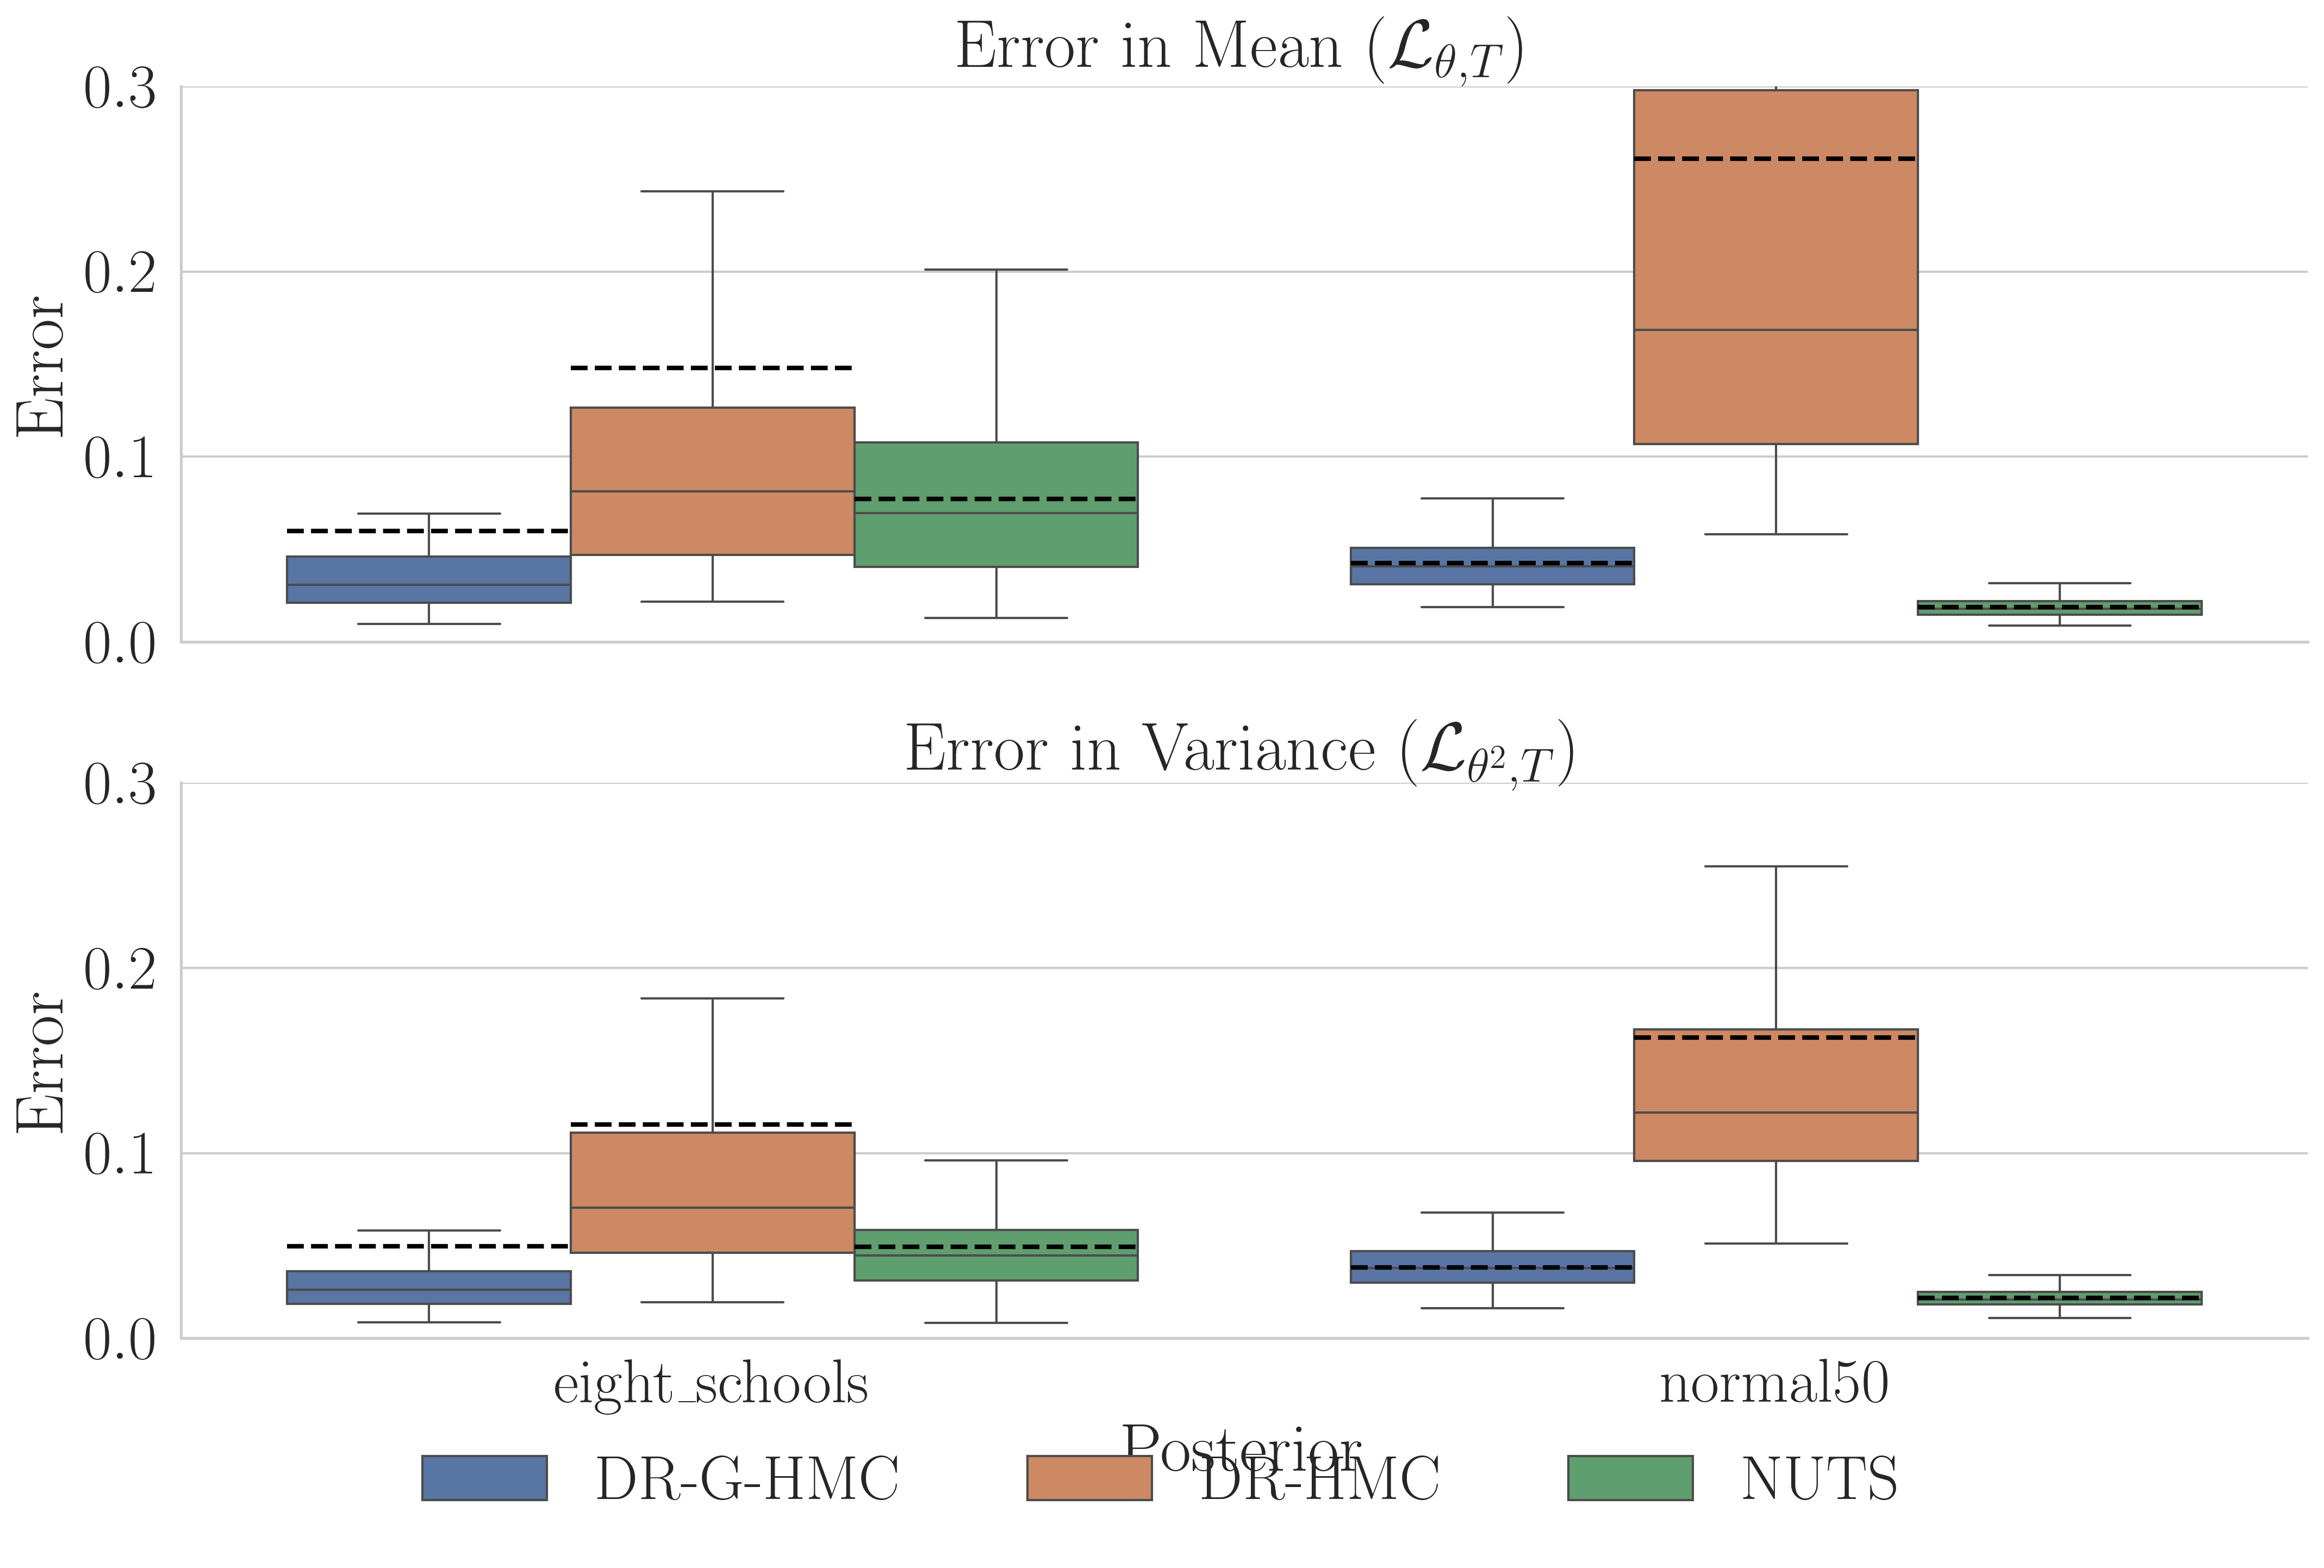

In [43]:
fig = sns.catplot(
    data=data,
    kind="box",
    y="Error",
    x="Posterior",
    hue="sampler_type",
    hue_order=["DR-G-HMC", "DR-HMC", "NUTS"],
    row="Error Type",
    # col="Posterior",
    fliersize=0,
    aspect=3,
    showmeans=True,
    meanline=True,
    meanprops=dict(linestyle="--", linewidth=2, color="black"),
    sharey=False,
)

# fig.set(yscale="log")
# set y-axis range
fig.set(ylim=(0, 3e-1))
fig.figure.subplots_adjust(bottom=0.15)
sns.move_legend(fig, "lower center", ncol=3, title="")

fig.set_titles(col_template="{col_name}")
# fig.axes.flat[0].set_ylabel(r'Error in Mean ($\mathcal{L}_{\theta, T}$)')
# fig.axes.flat[4].set_ylabel(r'Error in Variance ($\mathcal{L}_{\theta^2, T}$)')

# fig.set_ylabels("Error")
fig.axes.flat[0].set_title(r'Error in Mean ($\mathcal{L}_{\theta, T}$)')
fig.axes.flat[1].set_title(r'Error in Variance ($\mathcal{L}_{\theta^2, T}$)')

# Robust Hyper Params

In [8]:
posteriors = ["funnel10", "normal50", "eight_schools-eight_schools_centered"]
hyper_param = "damping"

In [9]:
def get_df(posterior):
    fname = os.path.join("../../data/", posterior, "summary.csv")
    return pd.read_csv(fname)

data = []
for posterior in posteriors:
    df = get_df(posterior)
    df = df[df["tags"] == hyper_param]
    df = df.assign(new_column="eight_schools" if posterior == "eight_schools-eight_schools_centered" else posterior)
    df = df.rename(columns={"new_column": "Posterior"})
    
    posterior_dict = {"funnel10": "funnel10", "normal50": "normal100", "eight_schools-eight_schools_centered": "eight_schools"}
    df["Posterior"] = df["Posterior"].apply(lambda x: posterior_dict[x] if x in posterior_dict else x)
    sampler_dict = {"drghmc": "DR-G-HMC", "nuts": "NUTS", "drhmc": "DR-HMC"}
    df["sampler_type"] = df["sampler_type"].apply(lambda x: sampler_dict[x] if x in sampler_dict else x)
    data.append(df)
data = pd.concat(data, ignore_index=True)

In [10]:
data = data.melt(id_vars=["sampler_type", "Posterior", hyper_param], value_vars=["error_param", "error_param_squared"], var_name="Error Type", value_name="Error")

# unique sampler_type values sorted alphabetically
hue_order = sorted(data["sampler_type"].unique().tolist())
row_order = sorted(data["Posterior"].unique().tolist())
row_order = ["funnel10", "eight_schools", "normal100"]

/mnt/home/gturok/mambaforge/envs/drghmc/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Error in Variance ($\\mathcal{L}_{\\theta^2, T}$)')

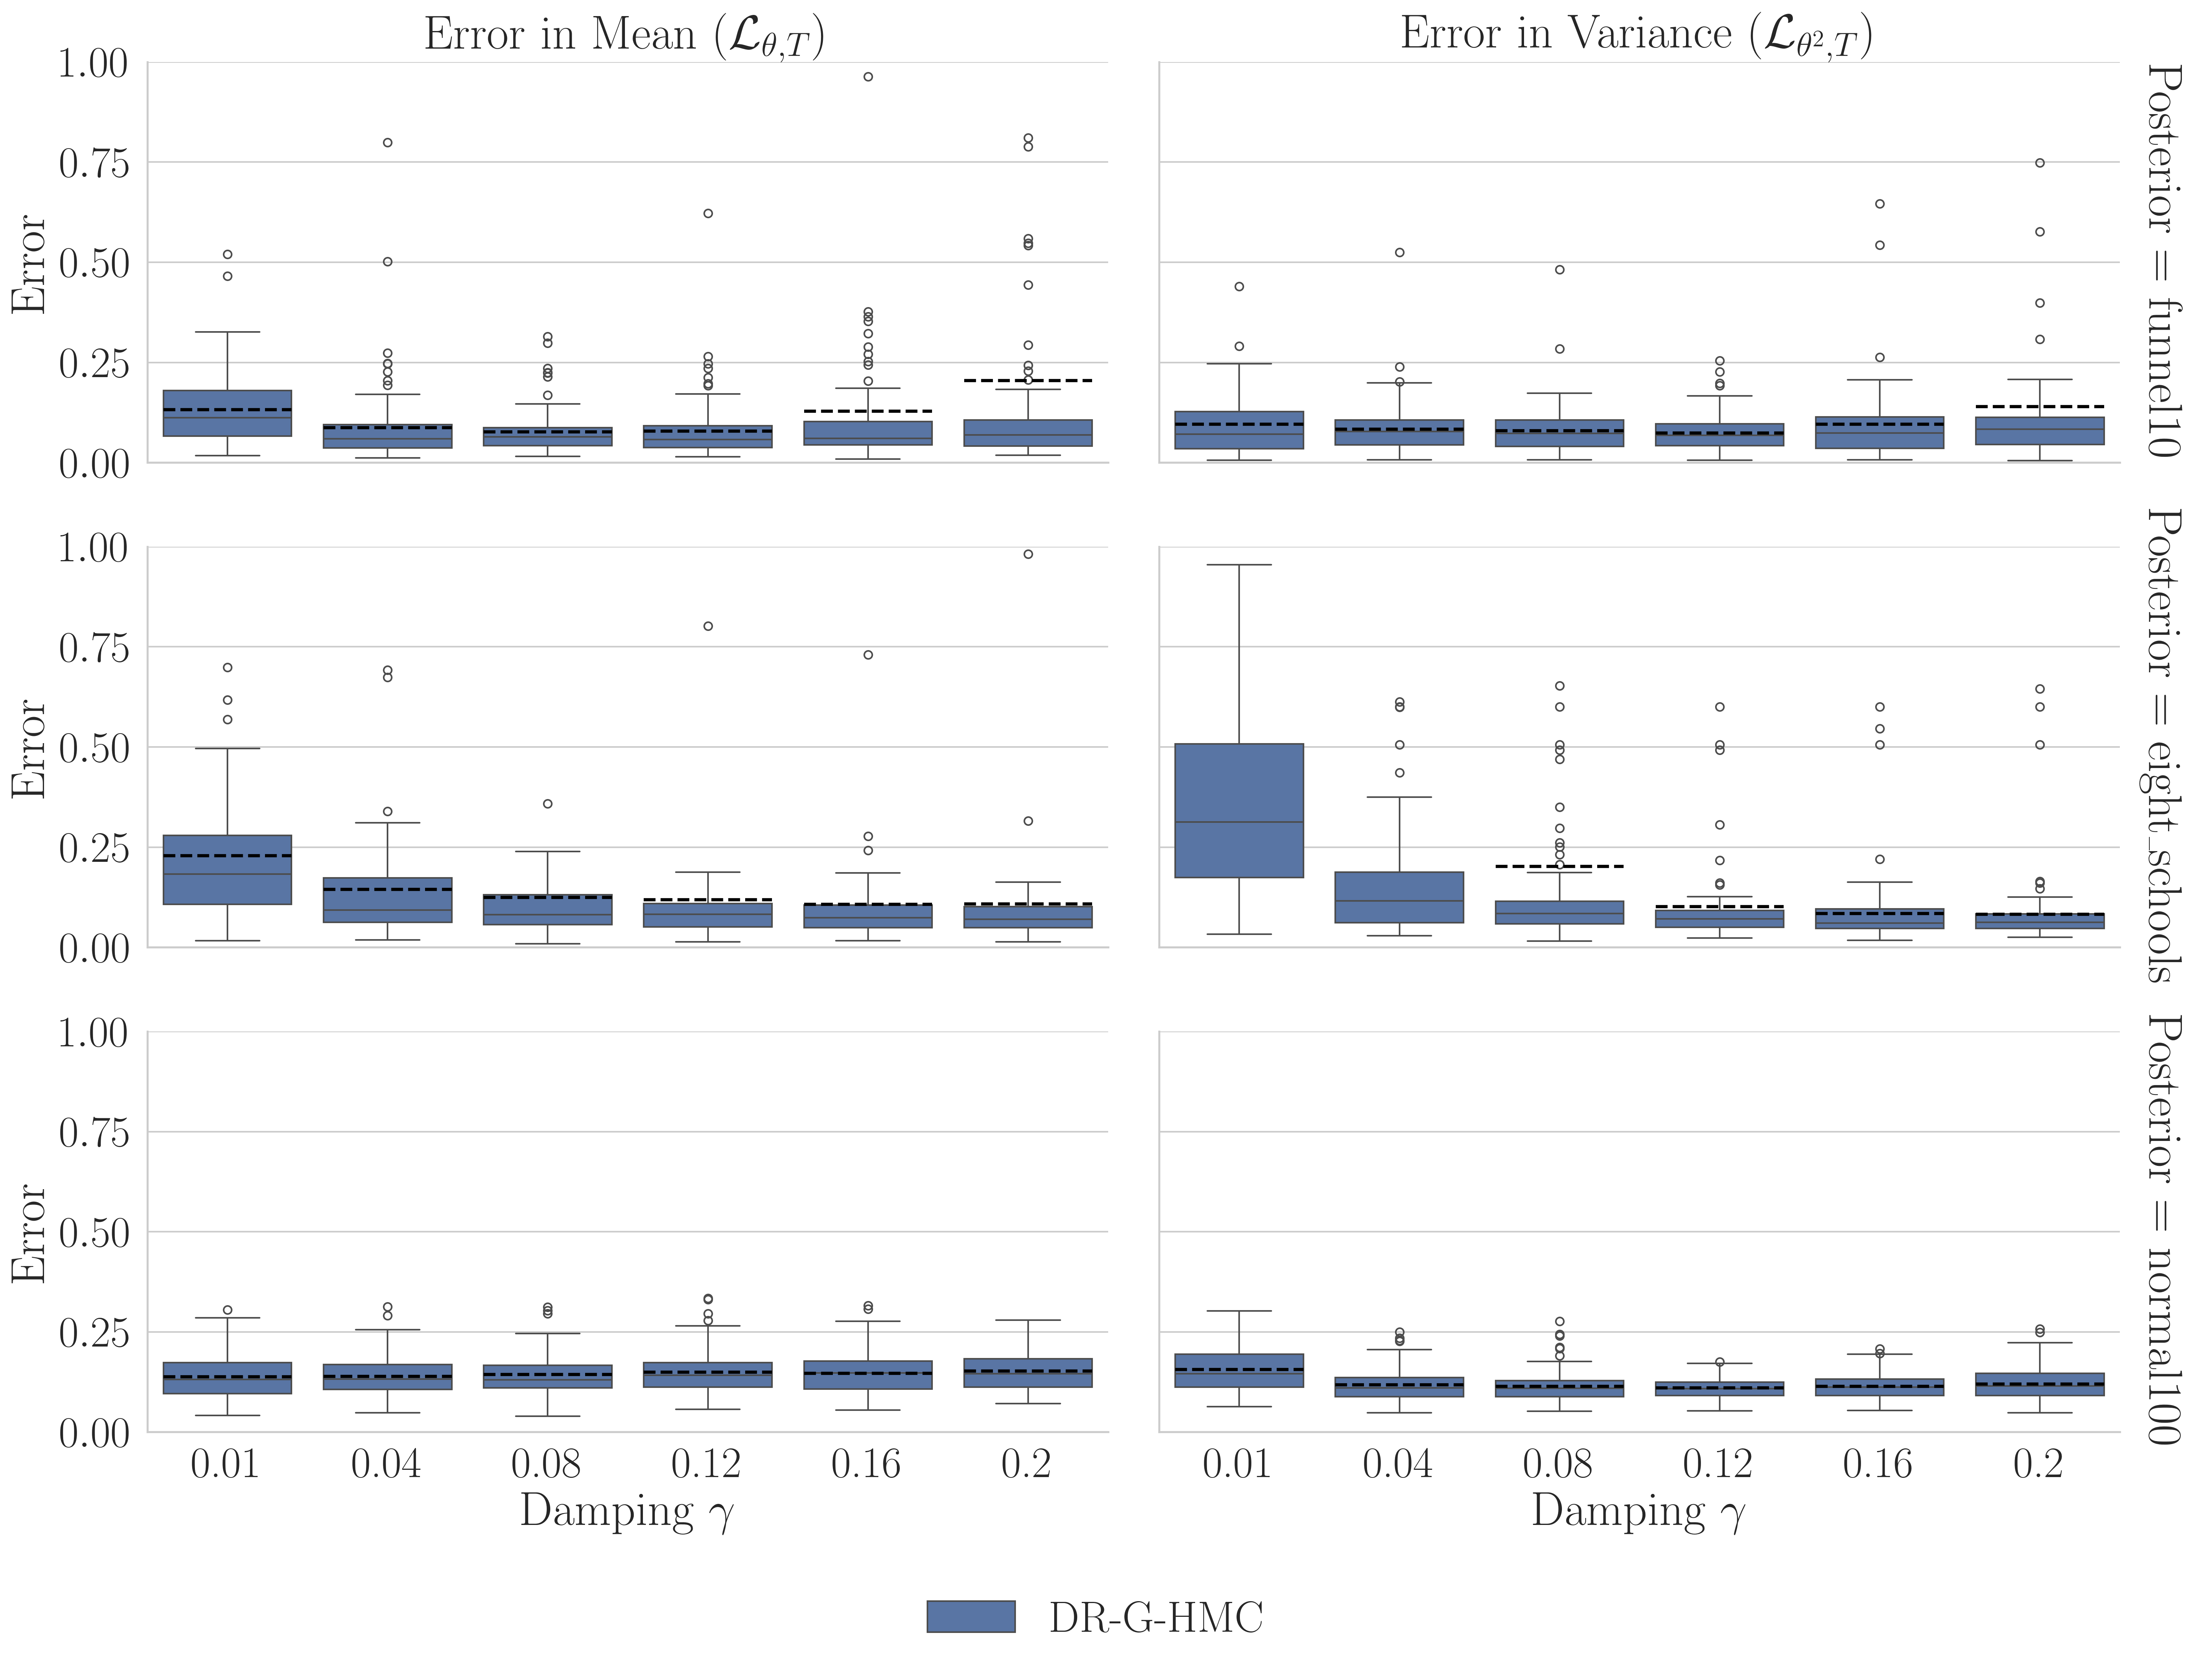

In [11]:
fig = sns.catplot(
    data=data,
    kind="box",
    y="Error",
    x=hyper_param,
    hue="sampler_type",
    hue_order=hue_order,
    col="Error Type",
    row="Posterior",
    row_order=row_order,
    aspect=2,
    showmeans=True,
    meanline=True,
    meanprops=dict(linestyle="--", linewidth=2, color="black"),
    margin_titles=True,
    facet_kws=dict(ylim=(0, 1e0)), # (5e-3, 1e2)
)

# fig.set(yscale="log")
fig.figure.subplots_adjust(bottom=0.15)
sns.move_legend(fig, "lower center", ncol=len(hue_order), title="")
fig.set_ylabels("Error")
fig.set_xlabels(r'Damping $\gamma$')
fig.axes.flat[0].set_title(r'Error in Mean ($\mathcal{L}_{\theta, T}$)')
fig.axes.flat[1].set_title(r'Error in Variance ($\mathcal{L}_{\theta^2, T}$)')